In [12]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from ml_utils import available_indices, extract_data
%matplotlib inline

orig_full_data = np.load("data/full_np_data.pickle.npy")
inter_full_data = np.load("data/linear_inter.pickle.npy")
orig_dates = np.load("data/dates.pickle.npy")


In [61]:
# Ideja: v vmesnem casu imamo tri merilce (dva podobna) in enega kar drugacnega (tistega ki je samo vmes ignoriramo)
start_date = datetime.date(day=3, month=1, year=2007)
end_date = datetime.date(day=3, month=1, year=2009)


In [84]:
# linear regression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# machine learning methods
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [85]:
inds, data = extract_data(orig_dates, start_date, end_date, inter_full_data)
# Probamo cez vse
print(inds)
regressor = linear_model.LinearRegression()
for real in range(len(inds)):
    predicted = cross_val_predict(regressor, np.array([data[j] for j in range(len(data)) if j != real]).T,data[real], cv = 10);
    print(real, inds[real])
    print("r2 :", r2_score(data[real], predicted))
    print("mse:", mean_squared_error(data[real], predicted))
    print("mae:", mean_absolute_error(data[real], predicted))
    

[9, 24, 33, 38, 42, 45, 46, 47]
0 9
r2 : 0.5772437810816986
mse: 0.043015285501929776
mae: 0.12918306695768128
1 24
r2 : 0.9717026329841989
mse: 0.011720502066683968
mae: 0.08399315950124911
2 33
r2 : 0.9891603960459331
mse: 0.0015502706555311058
mae: 0.028263955655199305
3 38
r2 : 0.5889319589826397
mse: 0.022165424558164715
mae: 0.09965253991747403
4 42
r2 : 0.9950822060862696
mse: 0.0010338661723689854
mae: 0.02197348767175533
5 45
r2 : -0.6163610529402879
mse: 0.23695100829040605
mae: 0.33407391658174235
6 46
r2 : 0.993433054839122
mse: 0.0009295844353649781
mae: 0.021238328711233493
7 47
r2 : 0.9939033133936503
mse: 0.0010473472673629477
mae: 0.02284454804138595


In [86]:
inds, data = extract_data(orig_dates, start_date, end_date, inter_full_data)
# Probamo cez vse
print(inds)
regressor = SVR()
for real in range(len(inds)): #Real je tista, ki jo napovedujemo
    predicted = cross_val_predict(regressor, np.array([data[j] for j in range(len(data)) if j != real]).T,data[real], cv = 10);
    print(real, inds[real])
    print("r2 :", r2_score(data[real], predicted))
    print("mse:", mean_squared_error(data[real], predicted))
    print("mae:", mean_absolute_error(data[real], predicted))
    

[9, 24, 33, 38, 42, 45, 46, 47]
0 9
r2 : 0.5131666823051159
mse: 0.04953510608567552
mae: 0.13285350700277163
1 24
r2 : 0.8565993246909053
mse: 0.05939520487491336
mae: 0.13192572261547944
2 33
r2 : 0.8485624967223172
mse: 0.02165845896890037
mae: 0.06968799124676228
3 38
r2 : 0.6706914362955545
mse: 0.017756827086541135
mae: 0.08458431979068745
4 42
r2 : 0.7836870713718789
mse: 0.04547539475582516
mae: 0.079658348125965
5 45
r2 : 0.48377828088451524
mse: 0.07567570167773627
mae: 0.23456788489079325
6 46
r2 : 0.7914851727597916
mse: 0.029516332662568187
mae: 0.07651663254412217
7 47
r2 : 0.7943547222493452
mse: 0.03532771710356957
mae: 0.07496458273387549


In [87]:
inds, data = extract_data(orig_dates, start_date, end_date, inter_full_data)
# Probamo cez vse
print(inds)
regressor = GradientBoostingRegressor()
for real in range(len(inds)): #Real je tista, ki jo napovedujemo
    predicted = cross_val_predict(regressor, np.array([data[j] for j in range(len(data)) if j != real]).T,data[real], cv = 10);
    print(real, inds[real])
    print("r2 :", r2_score(data[real], predicted))
    print("mse:", mean_squared_error(data[real], predicted))
    print("mae:", mean_absolute_error(data[real], predicted))
    

[9, 24, 33, 38, 42, 45, 46, 47]
0 9
r2 : 0.3934783608059702
mse: 0.06171334756419402
mae: 0.15272742519064605
1 24
r2 : 0.7846637525359299
mse: 0.08919023921997055
mae: 0.15750973809896787
2 33
r2 : 0.9049667522090695
mse: 0.013591571793065442
mae: 0.048920881503029194
3 38
r2 : 0.5946147440897388
mse: 0.021858999995798052
mae: 0.08345337724105657
4 42
r2 : 0.858626807485098
mse: 0.02972083905608336
mae: 0.05705850958365416
5 45
r2 : 0.4784542714803923
mse: 0.0764561766800012
mae: 0.2061016242323618
6 46
r2 : 0.9069380567862283
mse: 0.013173390643142883
mae: 0.041464908165492906
7 47
r2 : 0.8954571479537766
mse: 0.0179593732600434
mae: 0.04770052289577745


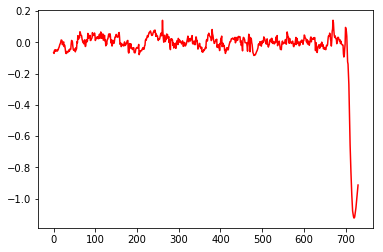

In [66]:
fig, ax = plt.subplots();
ax.plot(range(len(predicted)), predicted - data[real], 'r');
plt.show()

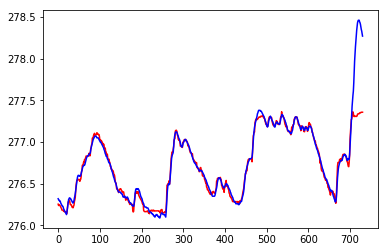

In [67]:
fig, ax = plt.subplots();
ax.plot(range(len(predicted)), predicted, 'r');
ax.plot(data[real], 'b')
plt.show()

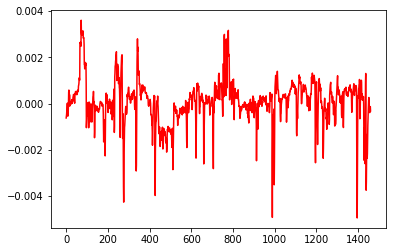

In [60]:
fig, ax = plt.subplots();
ax.plot(range(len(predicted)), (predicted - data[real])/data[real], 'r');
#ax.plot(data[0], 'b');
plt.show()

In [51]:
real

0